In [1]:
# Import the usual suspects....
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline


import pandas_datareader as pdr
import datetime as dt
import quandl


import pandas as pd
import numpy as np
import requests
from termcolor import colored as cl
from math import floor
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20, 10)
plt.style.use('fivethirtyeight')


import os
import random
import numpy as np
from pylab import mpl, plt
plt.style.use('seaborn')
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.family'] = 'serif'

import alpaca_trade_api as tradeapi
from dotenv import load_dotenv
import os
import pandas as pd



Bad key "text.kerning_factor" on line 4 in
C:\Users\44nas\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
from get_api_df import *

In [3]:
ticker = get_api_df()

Python-dotenv could not parse statement starting at line 11


In [4]:
ticker.tail()

,open,high,low,close,volume
time,,,,,
2021-06-28 00:00:00-04:00,133.42,135.245,133.350,134.75,53815255
2021-06-29 00:00:00-04:00,134.82,136.490,134.350,136.33,55081959
2021-06-30 00:00:00-04:00,136.17,137.410,135.870,136.94,51014239
2021-07-01 00:00:00-04:00,136.60,137.330,135.760,137.27,46267213
2021-07-02 00:00:00-04:00,137.92,140.000,137.745,139.96,69160944


In [5]:
ticker['return'] = np.log(ticker['close'] / 
                        ticker['close'].shift(1))

In [6]:
ticker['direction'] = np.where(ticker['return'] > 0, 1, 0)

In [7]:
lags = 5

cols = []
for lag in range(1, lags + 1):
    col = f'lag_{lag}'
    ticker[col] = ticker['return'].shift(lag)
    cols.append(col)

ticker.dropna(inplace=True)

In [8]:
ticker.round(4).tail()

,open,high,low,close,volume,return,direction,lag_1,lag_2,lag_3,lag_4,lag_5
time,,,,,,,,,,,,
2021-06-28 00:00:00-04:00,133.42,135.245,133.350,134.75,53815255,0.0122,1,-0.0022,-0.0022,-0.0020,0.0126,0.0144
2021-06-29 00:00:00-04:00,134.82,136.490,134.350,136.33,55081959,0.0117,1,0.0122,-0.0022,-0.0022,-0.0020,0.0126
2021-06-30 00:00:00-04:00,136.17,137.410,135.870,136.94,51014239,0.0045,1,0.0117,0.0122,-0.0022,-0.0022,-0.0020
2021-07-01 00:00:00-04:00,136.60,137.330,135.760,137.27,46267213,0.0024,1,0.0045,0.0117,0.0122,-0.0022,-0.0022
2021-07-02 00:00:00-04:00,137.92,140.000,137.745,139.96,69160944,0.0194,1,0.0024,0.0045,0.0117,0.0122,-0.0022


In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense 
from tensorflow.keras.optimizers import Adam, RMSprop 

In [10]:
optimizer = Adam(learning_rate=0.0001)

In [11]:
def set_seeds(seed=100):
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(100)

In [12]:
# set_seeds()
# model = Sequential()
# model.add(Dense(64, activation='relu',
#                input_shape=(lags,)))
# model.add(Dense(64, activation='relu'))
# model.add(Dense(1, activation='sigmoid'))

# model.compile(optimizer=optimizer,
#              loss='binary_crossentropy',
#              metrics=['accuracy'])

In [13]:
ticker['momentum'] = ticker['return'].rolling(5).mean().shift(1)

In [14]:
ticker['volatility'] = ticker['return'].rolling(20).std().shift(1)

In [15]:
ticker['distance'] = (ticker['close'] - 
                   ticker['close'].rolling(50).mean()).shift(1)

In [16]:
ticker.dropna(inplace=True)

In [17]:
cols.extend(['momentum', 'volatility', 'distance'])

In [18]:
print(ticker.round(4).tail())

                             open     high      low   close    volume  return  \
time                                                                            
2021-06-28 00:00:00-04:00  133.42  135.245  133.350  134.75  53815255  0.0122   
2021-06-29 00:00:00-04:00  134.82  136.490  134.350  136.33  55081959  0.0117   
2021-06-30 00:00:00-04:00  136.17  137.410  135.870  136.94  51014239  0.0045   
2021-07-01 00:00:00-04:00  136.60  137.330  135.760  137.27  46267213  0.0024   
2021-07-02 00:00:00-04:00  137.92  140.000  137.745  139.96  69160944  0.0194   

                           direction   lag_1   lag_2   lag_3   lag_4   lag_5  \
time                                                                           
2021-06-28 00:00:00-04:00          1 -0.0022 -0.0022 -0.0020  0.0126  0.0144   
2021-06-29 00:00:00-04:00          1  0.0122 -0.0022 -0.0022 -0.0020  0.0126   
2021-06-30 00:00:00-04:00          1  0.0117  0.0122 -0.0022 -0.0022 -0.0020   
2021-07-01 00:00:00-04:00       

#### check the correct date format

In [19]:
# print(ticker.index[0])

In [20]:
# cutoff = '2021-01-01 00:00:00-04:00'
cutoff = '2021-05-19 00:00:00-05:00'

In [21]:
training_ticker = ticker[ticker.index < cutoff].copy()
# training_ticker.head()

In [22]:
mu, std = training_ticker.mean(), training_ticker.std()

In [23]:
training_ticker_ = (training_ticker - mu) / std
# training_ticker_.head()

In [24]:
test_ticker = ticker[ticker.index >= cutoff].copy()
# test_ticker.head()

In [25]:
test_ticker_ = (test_ticker - mu) / std
# test_ticker_.head()

In [26]:
set_seeds()
model = Sequential()
model.add(Dense(32, activation='relu',
               input_shape=(len(cols),)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizer,
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [27]:
%%time
model.fit(training_ticker_[cols],
         training_ticker['direction'],
         epochs=50, verbose=False,
         validation_split=0.2, shuffle=False)

Wall time: 1.6 s


In [28]:
res = pd.DataFrame(model.history.history)

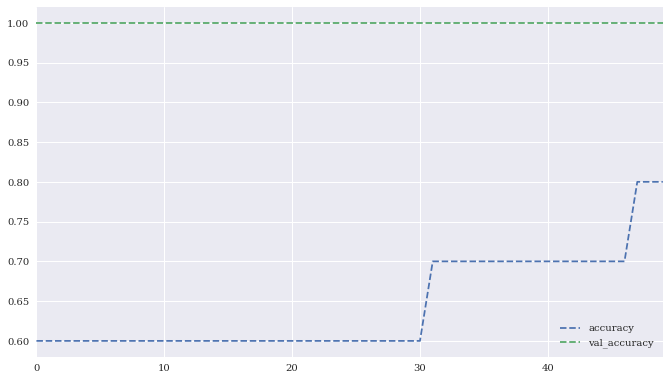

In [29]:
res[['accuracy', 'val_accuracy']].plot(figsize=(10, 6), style='--')

In [30]:
model.evaluate(training_ticker_[cols],
              training_ticker['direction'])

1/1 [==============================] - 0s 23ms/step - loss: 0.6341 - accuracy: 0.8462


[0.6340985894203186, 0.8461538553237915]

In [31]:
pred = np.where(model.predict(training_ticker_[cols]) > 0.5, 1, 0)
pred[:30].flatten()

array([0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0])

In [32]:
training_ticker['prediction'] = np.where(pred > 0, 1, -1)

In [33]:
training_ticker['strategy'] = (training_ticker['prediction'] * training_ticker['return'])

In [34]:
training_ticker[['return','strategy']].sum().apply(np.exp)

return      0.947997
strategy    1.166246
dtype: float64

C:\Users\44nas\anaconda3\envs\pyvizenv\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


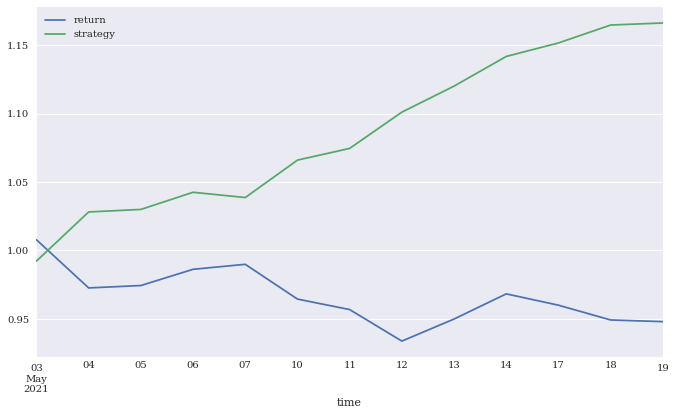

In [35]:
training_ticker[['return','strategy']].cumsum().apply(np.exp).plot(figsize=(10,6))

In [36]:
model.evaluate(test_ticker_[cols], test_ticker['direction'])

1/1 [==============================] - 0s 13ms/step - loss: 0.7317 - accuracy: 0.4194


[0.7317276000976562, 0.4193548262119293]

In [37]:
pred = np.where(model.predict(test_ticker_[cols]) > 0.5, 1, 0)

In [38]:
test_ticker['prediction'] = np.where(pred > 0, 1, -1)

In [39]:
test_ticker['prediction'].value_counts()

-1    29
 1     2
Name: prediction, dtype: int64

In [40]:
test_ticker['strategy'] =  (test_ticker['prediction'] * test_ticker['return'])

In [41]:
test_ticker[['return','strategy']].sum().apply(np.exp)

return      1.122464
strategy    0.902186
dtype: float64

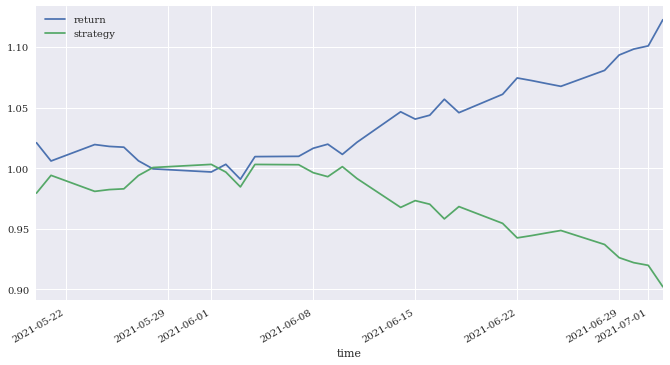

In [42]:
test_ticker[['return','strategy']].cumsum().apply(np.exp).plot(figsize=(10,6))